In [43]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import os, ssl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score

In [4]:
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
y = df['MedHouseVal']
X = df.drop(['MedHouseVal'], axis = 1)

In [15]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


In [16]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)
print(len(X))      # 20640
print(len(X_train)) # 15480
print(len(X_test))  # 5160

20640
15480
5160


In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
col_names=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
scaled_df = pd.DataFrame(X_train, columns=col_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,15480.0,2.074711e-16,1.000032,-1.774632,-0.688854,-0.175663,0.464450,5.842113
HouseAge,15480.0,-1.232434e-16,1.000032,-2.188261,-0.840224,0.032036,0.666407,1.855852
AveRooms,15480.0,-1.620294e-16,1.000032,-1.877586,-0.407008,-0.083940,0.257082,56.357392
AveBedrms,15480.0,7.435912e-17,1.000032,-1.740123,-0.205765,-0.108332,0.007435,55.925392
Population,15480.0,-8.996536e-17,1.000032,-1.246395,-0.558886,-0.227928,0.262056,29.971725
AveOccup,15480.0,1.055716e-17,1.000032,-0.201946,-0.056581,-0.024172,0.014501,103.737365
Latitude,15480.0,7.890329e-16,1.000032,-1.451215,-0.799820,-0.645172,0.971601,2.953905
Longitude,15480.0,2.206676e-15,1.000032,-2.380303,-1.106817,0.536231,0.785934,2.633738


In [20]:
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [21]:
y_pred = regressor.predict(X_test)

In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.4460739527131783
mse: 0.4316907430948294
rmse: 0.6570317671884894


In [24]:
regressor.score(X_test, y_test)

0.6737569252627673

In [25]:
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [26]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

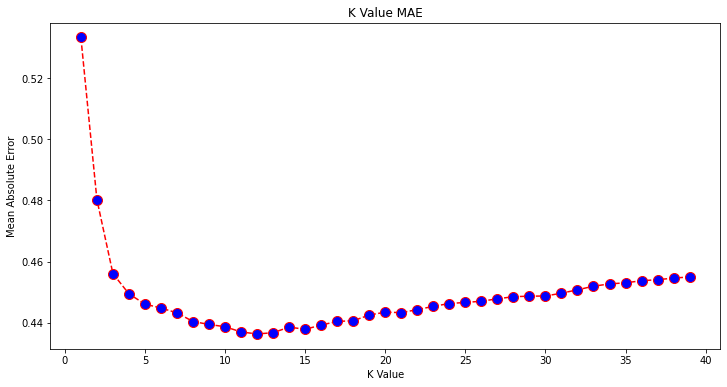

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'Mean Absolute Error')

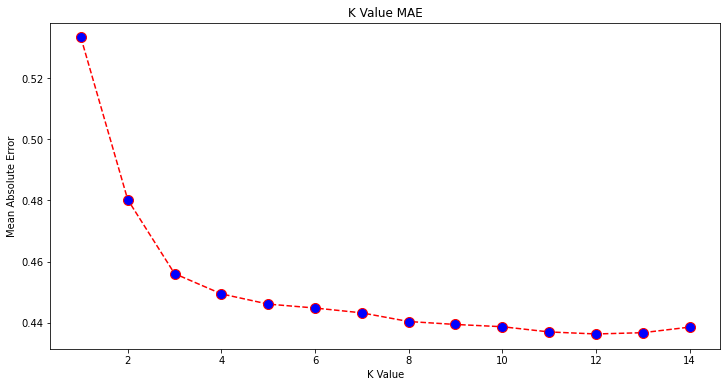

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error[:14], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [30]:
#Classification

In [31]:
df["MedHouseValCat"] = pd.qcut(df["MedHouseVal"], 4, retbins=False, labels=[1, 2, 3, 4])

In [32]:
y = df['MedHouseValCat']
X = df.drop(['MedHouseVal', 'MedHouseValCat'], axis = 1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
acc =  classifier.score(X_test, y_test)
print(acc) # 0.6191860465116279

0.6191860465116279


              precision    recall  f1-score   support

           1       0.75      0.78      0.76      1292
           2       0.49      0.56      0.53      1283
           3       0.51      0.51      0.51      1292
           4       0.76      0.62      0.69      1293

    accuracy                           0.62      5160
   macro avg       0.63      0.62      0.62      5160
weighted avg       0.63      0.62      0.62      5160



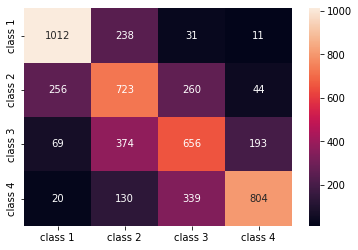

In [41]:
classes_names = ['class 1','class 2','class 3', 'class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

In [44]:
f1s = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

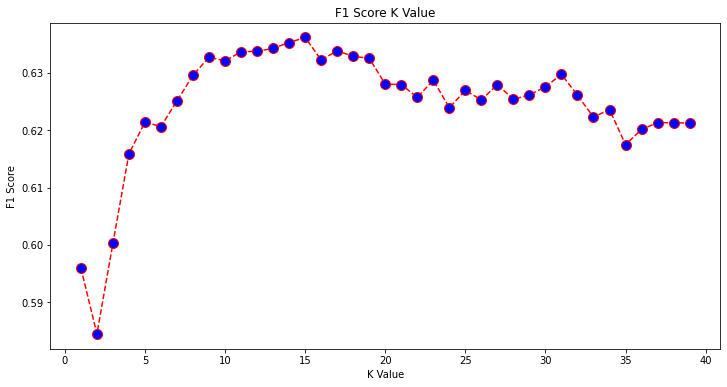

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [46]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.77      0.79      0.78      1292
           2       0.52      0.58      0.55      1283
           3       0.51      0.53      0.52      1292
           4       0.77      0.64      0.70      1293

    accuracy                           0.63      5160
   macro avg       0.64      0.63      0.64      5160
weighted avg       0.64      0.63      0.64      5160

